# DisGenNET data collection

Link: https://www.disgenet.org/downloads

Disclaimer: they used to share all the necessary files on their download page, but now (Nov 2023) these LINKS seem to be removed. Files, however, are still accessible, if you know their filenames, which we do! I believe it is possible to get everything via their Sqlite DB interface, but I didn't find the schema and I am not very interested in this.

We need the following files:

 - https://www.disgenet.org/static/disgenet_ap1/files/downloads/all_gene_disease_pmid_associations.tsv.gz
 - https://www.disgenet.org/static/disgenet_ap1/files/downloads/curated_gene_disease_associations.tsv.gz
 - https://www.disgenet.org/static/disgenet_ap1/files/downloads/disease_to_disease_CURATED.tsv.gz
 
 They can be obsolete, though, however, I am not seeing any updates since 2020.
 
 These files are dated by May 2020, which seems to be their latest release.

In [ ]:
## Downloading files

!wget https://www.disgenet.org/static/disgenet_ap1/files/downloads/all_gene_disease_pmid_associations.tsv.gz --no-check-certificate
!wget https://www.disgenet.org/static/disgenet_ap1/files/downloads/curated_gene_disease_associations.tsv.gz --no-check-certificate
!wget https://www.disgenet.org/static/disgenet_ap1/files/downloads/disease_to_disease_CURATED.tsv.gz --no-check-certificate


In [2]:
import pandas as pd
from tqdm import tqdm
import json

## Inspecting files

### `all_gene_disease_pmid_associations`

In [4]:
all_gene_disease_pmid_associations_df = pd.read_table(
    'all_gene_disease_pmid_associations.tsv.gz',
    dtype={'pmid': str}
)

In [5]:
all_gene_disease_pmid_associations_df

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,pmid,source
0,1,A1BG,0.700,0.538,C0001418,Adenocarcinoma,group,C04,Neoplastic Process,0.01,1.0,2008.0,2008.0,18706098,LHGDN
1,1,A1BG,0.700,0.538,C0002736,Amyotrophic Lateral Sclerosis,disease,C18;C10,Disease or Syndrome,0.01,1.0,2008.0,2008.0,18973555,BEFREE
2,1,A1BG,0.700,0.538,C0003578,Apnea,phenotype,C23;C08,Sign or Symptom,0.01,1.0,2017.0,2017.0,28412161,BEFREE
3,1,A1BG,0.700,0.538,C0003864,Arthritis,disease,C05,Disease or Syndrome,0.01,1.0,2019.0,2019.0,30770760,BEFREE
4,1,A1BG,0.700,0.538,C0008373,Cholesteatoma,disease,C17,Disease or Syndrome,0.01,1.0,2020.0,2020.0,31077404,BEFREE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241571,115804232,CEROX1,NaN,NaN,C0005890,Body Height,phenotype,NaN,Organism Attribute,0.10,1.0,2019.0,2019.0,30595370,GWASCAT
3241572,115891964,MIR223HG,0.861,0.077,C0023418,leukemia,disease,C04,Neoplastic Process,0.01,1.0,2016.0,2016.0,27517498,BEFREE
3241573,115891964,MIR223HG,0.861,0.077,C0023467,"Leukemia, Myelocytic, Acute",disease,C04,Neoplastic Process,0.01,1.0,2016.0,2016.0,27517498,BEFREE
3241574,115891964,MIR223HG,0.861,0.077,C0598766,Leukemogenesis,disease,C23;C04,Neoplastic Process,0.01,1.0,2016.0,2016.0,27517498,BEFREE


In [6]:
gene_symbol_ids = set()

In [7]:
gene_symbol_ids.update(
    all_gene_disease_pmid_associations_df['geneSymbol'].drop_duplicates()
)

In [8]:
all_gene_disease_pmid_associations_df['pmid'].isna().sum()

200072

<AxesSubplot:>

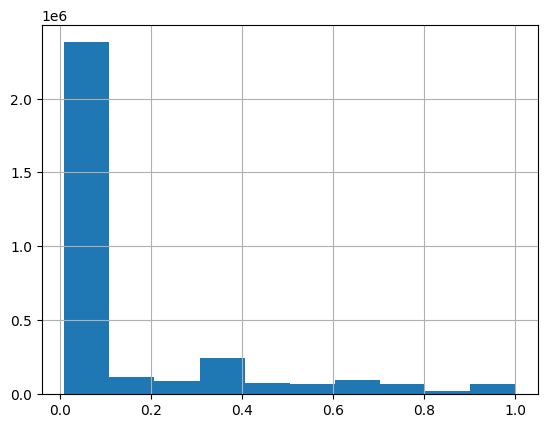

In [9]:
all_gene_disease_pmid_associations_df['score'].hist()

### `curated_gene_disease_associations`

In [10]:
curated_gene_disease_associations_df = pd.read_table(
    'curated_gene_disease_associations.tsv.gz'
)

In [12]:
curated_gene_disease_associations_df

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
0,1,A1BG,0.700,0.538,C0019209,Hepatomegaly,phenotype,C23;C06,Finding,0.30,1.000,2017.0,2017.0,1,0,CTD_human
1,1,A1BG,0.700,0.538,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.30,1.000,2015.0,2015.0,1,0,CTD_human
2,2,A2M,0.529,0.769,C0002395,Alzheimer's Disease,disease,C10;F03,Disease or Syndrome,0.50,0.769,1998.0,2018.0,3,0,CTD_human
3,2,A2M,0.529,0.769,C0007102,Malignant tumor of colon,disease,C06;C04,Neoplastic Process,0.31,1.000,2004.0,2019.0,1,0,CTD_human
4,2,A2M,0.529,0.769,C0009375,Colonic Neoplasms,group,C06;C04,Neoplastic Process,0.30,1.000,2004.0,2004.0,1,0,CTD_human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84033,109580095,HBB-LCR,0.743,0.115,C0002875,Cooley's anemia,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84034,109580095,HBB-LCR,0.743,0.115,C0005283,beta Thalassemia,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84035,109580095,HBB-LCR,0.743,0.115,C0019025,Hemoglobin F Disease,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84036,109580095,HBB-LCR,0.743,0.115,C0085578,Thalassemia Minor,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human


In [13]:
gene_symbol_ids.update(
    curated_gene_disease_associations_df['geneSymbol'].drop_duplicates()
)

len(gene_symbol_ids)

21666

<AxesSubplot:>

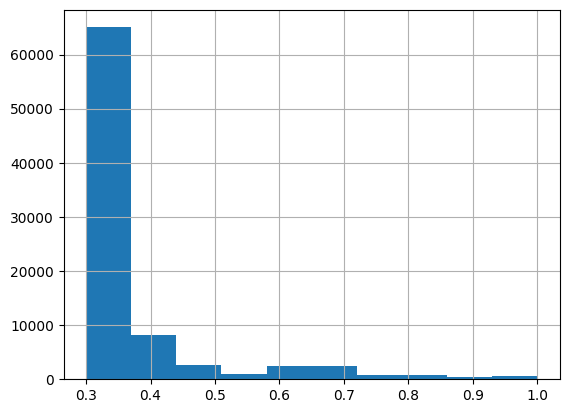

In [11]:
curated_gene_disease_associations_df['score'].hist()

In [12]:
curated_gene_disease_associations_df['source'].value_counts()

CTD_human                                                  61485
GENOMICS_ENGLAND                                            5408
PSYGENET                                                    3159
ORPHANET                                                    3133
UNIPROT                                                     1651
CTD_human;GENOMICS_ENGLAND;UNIPROT                          1411
CTD_human;GENOMICS_ENGLAND;ORPHANET;UNIPROT                 1182
CGI                                                         1084
CTD_human;GENOMICS_ENGLAND                                   979
CLINGEN                                                      734
GENOMICS_ENGLAND;UNIPROT                                     633
CTD_human;ORPHANET                                           618
CTD_human;GENOMICS_ENGLAND;ORPHANET                          585
GENOMICS_ENGLAND;ORPHANET                                    354
CGI;CTD_human                                                272
CTD_human;UNIPROT        

#### How many curated g-d pairs have pmids?

In [14]:
curated_gene_disease_associations_pmids_df = (
    pd.merge(
        curated_gene_disease_associations_df,
        all_gene_disease_pmid_associations_df,
        left_on=['geneSymbol', 'diseaseId'],
        right_on=['geneSymbol', 'diseaseId'],
        how='inner'
    )
    [['geneSymbol', 'diseaseId', 'diseaseName_x', 'pmid']]
)

In [17]:
curated_gene_disease_associations_pmids_df.dropna().drop_duplicates()

,geneSymbol,diseaseId,diseaseName_x,pmid
0,A1BG,C0019209,Hepatomegaly,28108177
1,A1BG,C0036341,Schizophrenia,25821032
2,A2M,C0002395,Alzheimer's Disease,15023809
3,A2M,C0002395,Alzheimer's Disease,10688047
4,A2M,C0002395,Alzheimer's Disease,11121179
...,...,...,...,...
704752,RNU6-456P,C4722327,"PROSTATE CANCER, HEREDITARY, 1",29892016
704754,MTCO2P12,C0268237,Cytochrome-c Oxidase Deficiency,18245391
704756,MTCO2P12,C0268237,Cytochrome-c Oxidase Deficiency,10487525
704757,MTCO2P12,C0268237,Cytochrome-c Oxidase Deficiency,20812865


In [18]:
#number of unique g-d pairs

curated_gene_disease_associations_pmids_df[['geneSymbol', 'diseaseId']].dropna().drop_duplicates()

,geneSymbol,diseaseId
0,A1BG,C0019209
1,A1BG,C0036341
2,A2M,C0002395
46,A2M,C0007102
48,A2M,C0009375
...,...,...
704760,HBB-LCR,C0002875
704761,HBB-LCR,C0005283
704762,HBB-LCR,C0019025
704763,HBB-LCR,C0085578


### `disease_to_disease_CURATED`

In [19]:
disease_to_disease_CURATED_df = pd.read_table(
    'disease_to_disease_CURATED.tsv.gz'
)

In [20]:
disease_to_disease_CURATED_df

,diseaseId2,diseaseId1,source,Ngenes,NgenesD1,NgenesD2,union_genes,jaccard_genes,Nvariants,NvariantsD1,NvariantsD2,union_variant,jaccard_variant,diseaseId1_name,diseaseId2_name
0,C0000731,C0000737,CURATED,0,0,0,0,0.000000,1,11,6,16,0.062500,Abdominal Pain,Abdomen distended
1,C0000731,C0005745,CURATED,0,0,0,0,0.000000,1,49,6,54,0.018519,Blepharoptosis,Abdomen distended
2,C0000731,C0006325,CURATED,0,0,0,0,0.000000,1,6,6,11,0.090909,Bruxism,Abdomen distended
3,C0000731,C0007642,CURATED,0,0,0,0,0.000000,1,1,6,6,0.166667,Cellulitis,Abdomen distended
4,C0000731,C0009806,CURATED,0,0,0,0,0.000000,1,49,6,54,0.018519,Constipation,Abdomen distended
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819919,C4757950,C4015062,CURATED,1,1,7,7,0.142857,0,0,0,0,0.000000,COMBINED OXIDATIVE PHOSPHORYLATION DEFICIENCY 22,Isolated ATP synthase deficiency
1819920,C4757950,C4225415,CURATED,1,1,7,7,0.142857,0,0,0,0,0.000000,"MYOPATHY, LACTIC ACIDOSIS, AND SIDEROBLASTIC A...",Isolated ATP synthase deficiency
1819921,C4757950,C4748269,CURATED,1,1,7,7,0.142857,0,0,0,0,0.000000,MITOCHONDRIAL COMPLEX V (ATP SYNTHASE) DEFICIE...,Isolated ATP synthase deficiency
1819922,C4757950,C4751573,CURATED,2,2,7,7,0.285714,0,0,0,0,0.000000,Periodic paralysis with later-onset distal mot...,Isolated ATP synthase deficiency


In [21]:
disease_to_disease_CURATED_df[['diseaseId2', 'diseaseId2']].drop_duplicates()

,diseaseId2,diseaseId2
0,C0000731,C0000731
127,C0000737,C0000737
486,C0000744,C0000744
492,C0000768,C0000768
702,C0000771,C0000771
...,...,...
1819854,C4755278,C4755278
1819857,C4755299,C4755299
1819871,C4755302,C4755302
1819880,C4755309,C4755309


## Mapping: Gene symbol -> UMLS

## UMLS (MRCONSO)

In [18]:
mrconso_path = (
    '../../UMLS_Metathesaurus/mrconso_and_semtypes_2022AA_df.pkl'
)

In [19]:
mrconso_st_df = pd.read_pickle(mrconso_path)

In [20]:
mrconso_st_df

,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR,SRL,SUPPRESS,CVF,sem_types
0,C0000005,ENG,P,L0000005,PF,S0007492,Y,A26634265,NaN,M0019694,D012711,MSH,PEP,D012711,(131)I-Macroaggregated Albumin,NaN,N,256.0,"{Pharmacologic Substance, Indicator, Reagent, ..."
1,C0000005,ENG,S,L0270109,PF,S0007491,Y,A26634266,NaN,M0019694,D012711,MSH,ET,D012711,(131)I-MAA,NaN,N,256.0,"{Pharmacologic Substance, Indicator, Reagent, ..."
10,C0000039,ENG,P,L0000039,PF,S17175117,N,A28315139,9194921.0,1926948,NaN,RXNORM,IN,1926948,"1,2-dipalmitoylphosphatidylcholine",NaN,N,256.0,"{Pharmacologic Substance, Organic Chemical}"
11,C0000039,ENG,P,L0000039,PF,S17175117,Y,A28572604,NaN,NaN,NaN,MTH,PN,NOCODE,"1,2-dipalmitoylphosphatidylcholine",NaN,N,256.0,"{Pharmacologic Substance, Organic Chemical}"
12,C0000039,ENG,P,L0000039,VC,S0007564,Y,A0016515,NaN,M0023172,D015060,MSH,MH,D015060,"1,2-Dipalmitoylphosphatidylcholine",NaN,N,NaN,"{Pharmacologic Substance, Organic Chemical}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16857339,C5574640,ENG,S,L17663434,PF,S21286067,Y,A33944162,NaN,Q9004,NaN,HCPCS,AB,Q9004,Va whole health partner serv,NaN,Y,NaN,{Health Care Activity}
16857340,C5574641,ENG,P,L17663430,PF,S21286031,Y,A33944163,NaN,S1091,NaN,HCPCS,PT,S1091,"Stent, non-coronary, temporary, with delivery ...",NaN,N,NaN,{Medical Device}
16857341,C5574641,ENG,S,L17663429,PF,S21286030,Y,A33944560,NaN,S1091,NaN,HCPCS,AB,S1091,Stent non-coronary propel,NaN,Y,NaN,{Medical Device}
16857342,C5574642,ENG,P,L17662944,PF,S21285763,Y,A33944049,NaN,S9432,NaN,HCPCS,PT,S9432,Medical foods for non-inborn errors of metabolism,NaN,N,NaN,{Food}


In [21]:
pref_semtypes = {
    'Amino Acid, Peptide, or Protein',
    'Gene or Genome'
}

In [22]:
mrconso_gene_st_df = mrconso_st_df[
    (
          mrconso_st_df['STR'].isin(gene_symbol_ids)
        & mrconso_st_df['sem_types'].apply(lambda x: pref_semtypes.intersection(x))
    )
]

In [30]:
gene_symb_to_cui_agg_df = (
    mrconso_gene_st_df[
        ['CUI', 'STR']
    ]
        .groupby('STR')
        .agg(set)
        .reset_index()
)

In [52]:
gene_symb_to_cui_agg_df

,STR,CUI
0,A1BG,{C1412045}
1,A1BG-AS1,{C2829919}
2,A1CF,"{C0104364, C2240226}"
3,A2M,"{C1412046, C3813120}"
4,A2ML1,{C1825487}
...,...,...
21015,ZYG11A,{C1824087}
21016,ZYG11B,{C1824088}
21017,ZYX,{C1421874}
21018,ZZEF1,{C1428781}


In [53]:
curated_gene_disease_associations_pmids_genecui_df = (
    pd.merge(
        curated_gene_disease_associations_pmids_df,
        gene_symb_to_cui_agg_df,
        left_on='geneSymbol',
        right_on='STR',
        how='inner'
    )
    .explode('CUI')
    .rename(columns={'CUI': 'gene_CUI'})
)

In [54]:
curated_gene_disease_associations_pmids_genecui_df['pmid']

0         28108177
1         25821032
2         15023809
2         15023809
3         10688047
            ...   
704566         NaN
704567    10487525
704568    20812865
704569    26507665
704570         NaN
Name: pmid, Length: 1600650, dtype: object

In [56]:
curated_gene_disease_associations_pmids_genecui_df

,geneSymbol,diseaseId,diseaseName_x,pmid,STR,gene_CUI
0,A1BG,C0019209,Hepatomegaly,28108177,A1BG,C1412045
1,A1BG,C0036341,Schizophrenia,25821032,A1BG,C1412045
2,A2M,C0002395,Alzheimer's Disease,15023809,A2M,C1412046
2,A2M,C0002395,Alzheimer's Disease,15023809,A2M,C3813120
3,A2M,C0002395,Alzheimer's Disease,10688047,A2M,C1412046
...,...,...,...,...,...,...
704566,MTCO2P12,C0268237,Cytochrome-c Oxidase Deficiency,NaN,MTCO2P12,C4085494
704567,MTCO2P12,C0268237,Cytochrome-c Oxidase Deficiency,10487525,MTCO2P12,C4085494
704568,MTCO2P12,C0268237,Cytochrome-c Oxidase Deficiency,20812865,MTCO2P12,C4085494
704569,DHS6S1,C0730294,North Carolina macular dystrophy,26507665,DHS6S1,C4225185


## Putting all pairs together

In [75]:
disgennet_all_pairs = []

In [62]:
gene_dis_raw_pairs_list = list(
    zip(
        curated_gene_disease_associations_pmids_genecui_df['diseaseId'],
        curated_gene_disease_associations_pmids_genecui_df['gene_CUI']
    )
)

In [63]:
dis_dis_raw_pairs_list = list(
    zip(
        disease_to_disease_CURATED_df['diseaseId1'],
        disease_to_disease_CURATED_df['diseaseId2']
    )
)

In [76]:
disgennet_all_pairs += gene_dis_raw_pairs_list
disgennet_all_pairs += dis_dis_raw_pairs_list

In [77]:
disgennet_all_pairs_set = {
    tuple(sorted(pair)) for pair in disgennet_all_pairs
}

In [78]:
len(disgennet_all_pairs_set)

1064881

In [80]:
with open('disgennet_all_pairs_set.json', 'w') as f:
    json.dump(list(disgennet_all_pairs_set), f)